In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style 
from scipy.ndimage.filters import gaussian_filter1d
from scipy.constants import c,h,k 
style.use("default")

Reference for the CIE 1964 data: https://www.sciencedirect.com/science/article/pii/B9780857092298500048?fbclid=IwAR3b9LN8XORHm6SYfNQFqsmjqfYbc-i75rN26nPMfCZT9I9JggmyNzEh02s

In [2]:
N = 100000

def convert(x): #converts from nanometer to meter
    return x*(1e-9)

#Planck's blackbody radiation formula 
def B(wavelength, T): 
    return (2*h*(c**2))/(convert(wavelength)**5*(np.exp(h*c/(convert(wavelength)*k*T))-1))

#wavelength range 
wavelength = np.linspace(380,750,num=75) #in nanometers #visible spectrum
T = np.linspace(1000,10000,num=10)


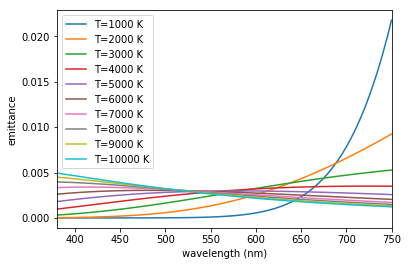

In [3]:
for i in T: 
    area = np.trapz(B(wavelength,i), wavelength)
    normalized = B(wavelength,i)/area
    plt.plot(wavelength,normalized, label = "T=%.0f K" % i)
plt.xlabel('wavelength (nm)')
plt.ylabel('emittance')
plt.xlim(380,750)
plt.legend()
plt.show()
    

In [4]:
CIE = np.loadtxt("CIE_380_700.txt", float)
wav_CIE = CIE[:,0]
xbar = CIE[:,1]
ybar = CIE[:,2]
zbar = CIE[:,3]

wav_new = np.linspace(380,750, num=75)
xbar_new = np.interp(wav_new, wav_CIE, xbar)
ybar_new = np.interp(wav_new, wav_CIE, ybar)
zbar_new = np.interp(wav_new, wav_CIE, zbar)

cie1 = np.loadtxt("CIE_380_700.txt", float)
wavl1 = cie1[:,0]
xbar1 = cie1[:,1]
ybar1 = cie1[:,2]
zbar1 = cie1[:,3]
I1 = cie1[:,4]

x1 = xbar1/I1
y1 = ybar1/I1

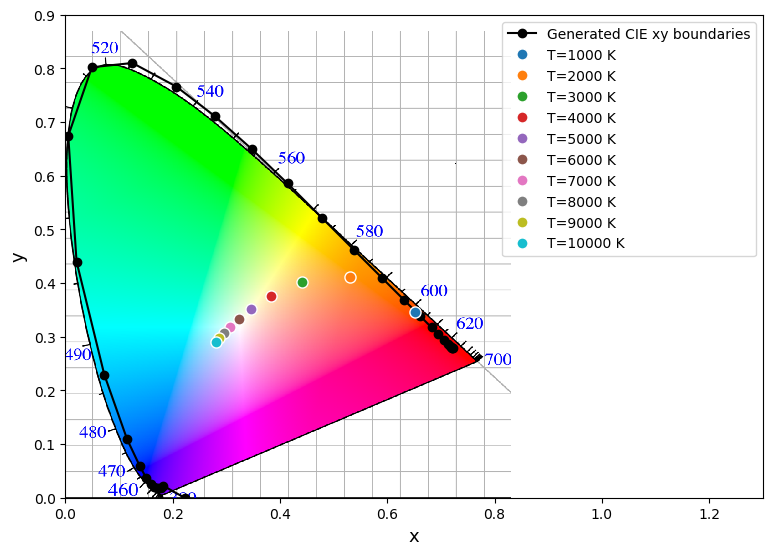

In [7]:
plt.figure(figsize=(9,9))
xlist = []
ylist = []
colorspace = plt.imread("CIExy19312.png")
plt.imshow(colorspace, extent=(0.000, 0.83,0.0000,0.87))
plt.plot(x1,y1, "ko-", label ="Generated CIE xy boundaries")
for i in T:
    X = np.trapz((B(wavelength,i)*xbar_new),wavelength)
    Y = np.trapz((B(wavelength,i)*ybar_new),wavelength)
    Z = np.trapz((B(wavelength,i)*zbar_new),wavelength)
    I = X + Y + Z 
    x = X/I
    y = Y/I
    z = 1-x-y
    xlist.append(x)
    ylist.append(y)
    plt.plot(x,y, "o", label = "T=%.0f K" % i, marker='o',markeredgecolor='white', markersize=8)
    plt.legend(loc = "upper right")
    plt.xlim(0.0,1.3)
    plt.ylim(0.0,0.9)
    plt.xlabel("x", fontsize = 13)
    plt.ylabel("y", fontsize = 13)
    
    